<module 'matplotlib.pyplot' from 'C:\\Users\\su\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

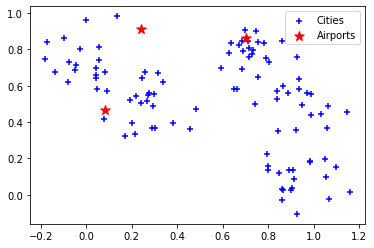

In [138]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

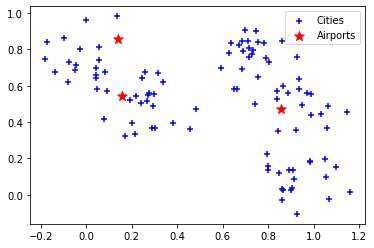

In [139]:
#This is generalized, more cities and airports can be added and it should still function.
#Only supports 2 dimensions for now

#------------------HYPERPARAMTERS---------------------------------
#step value
alpha = .0015
#how many steps to calculate
step_iterations = 30
#-----------------------------------------------------------------

#can't edit tuples, so we make a list from them
airportlist = [list(airport) for airport in airports] 
#create adjacency list for airports, clist[0] = lists of lists of cities closest to airport 1 etc....
clist = [[] for _ in range(len(airports))]
#hold the history of our objective function output
objective_history = []

#compute the adjacency lists
for city in cities:
    distance = []
    for i in range (len(airports)):
        distance.append(np.sqrt(np.square(airports[i][0] - city[0]) + np.square(airports[i][1] - city[1])))
    #finds the index of the min value in the distance list
    clist[distance.index(min(distance))].append(list(city))




for _ in range(step_iterations):
    #x and y deltas for each airport
    delta = [[0, 0] for _ in range(len(clist))]
    objective = 0
    #check each airport adjacency list
    
    for i in range (len(clist)):
        #for each city in the adjacency list
        for city in clist[i]:
            #calcualte the deltas and objective
            delta[i][0] += (city[0] - airportlist[i][0])
            delta[i][1] += (city[1] - airportlist[i][1])
            objective += np.square(airportlist[i][0] - city[0]) + np.square(airportlist[i][1] - city[1])
            
    for i in range (len(airportlist)):
        #update the airport location using the formula
        airportlist[i][0] = airportlist[i][0] + alpha * delta[i][0] * 2
        airportlist[i][1] = airportlist[i][1] + alpha * delta[i][1] * 2
        
    objective_history.append(objective)
    
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airportlist)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()

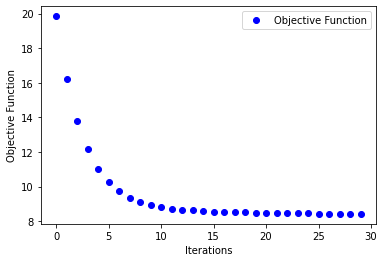

In [140]:
plt.xlabel('Iterations')
plt.ylabel('Objective Function')
plt.plot(objective_history, '-bo', label = 'Objective Function', linestyle = 'None')
plt.legend()

To make the graph look nice the amount of iterations is low and the value of alpha is also unnecessarily small. You can change these hyperparameters above to get a more efficient optimal solution.